## Pest Classification and Recommendation System Using CNN








## Mount Google Drive and Analyze Dataset


In [ ]:
from google.colab import drive
import os
import shutil
from sklearn.model_selection import train_test_split

# Mount Google Drive
drive.mount('/content/drive')

# Define Dataset Path
dataset_dir = "/content/drive/MyDrive/CNN"  # Update with your dataset folder path
base_dir = "/content/split_dataset"


Mounted at /content/drive


In [ ]:


# Directories for splits
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Create directories for training, validation, and test sets
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Analyze Dataset: Get class distribution
class_names = os.listdir(dataset_dir)
class_distribution = {}

for class_name in class_names:
    class_path = os.path.join(dataset_dir, class_name)
    class_distribution[class_name] = len(os.listdir(class_path))

print(f"Classes in the dataset: {class_names}")
print(f"Class distribution: {class_distribution}")

Classes in the dataset: ['Chinch_Bug', 'European_Earwig', 'Dasineura_Sp', 'Fire_Ant', 'Large_Cutworm', 'Peach_Borer', 'Hornworm', 'Beet_Fly', 'Grasshopper', 'Adristyrannus']
Class distribution: {'Chinch_Bug': 300, 'European_Earwig': 278, 'Dasineura_Sp': 252, 'Fire_Ant': 284, 'Large_Cutworm': 278, 'Peach_Borer': 281, 'Hornworm': 285, 'Beet_Fly': 182, 'Grasshopper': 271, 'Adristyrannus': 193}


## Split Dataset

In [ ]:
# Split Dataset into Train, Validation, and Test Sets
for class_name in class_names:
    class_path = os.path.join(dataset_dir, class_name)
    images = os.listdir(class_path)

    # Split data: Train (70%), Validation (15%), Test (15%)
    train_images, temp_images = train_test_split(images, test_size=0.3, random_state=42)
    val_images, test_images = train_test_split(temp_images, test_size=0.5, random_state=42)

    # Create class directories for each split
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

    # Move images into respective directories
    for img in train_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(train_dir, class_name, img))
    for img in val_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(val_dir, class_name, img))
    for img in test_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(test_dir, class_name, img))

print("Dataset successfully split into training, validation, and test sets!")


Dataset successfully split into training, validation, and test sets!


## Data Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size and batch size
img_size = (128, 128)
batch_size = 32

# Data Augmentation and Generators
datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False  # No shuffling for test set
)


Found 1815 images belonging to 10 classes.
Found 392 images belonging to 10 classes.
Found 394 images belonging to 10 classes.


Define a CNN Model

In [ ]:
from tensorflow.keras import layers, models

# Build the CNN model
model = models.Sequential()

# Add convolutional and max pooling layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))  # First Conv Layer
model.add(layers.MaxPooling2D((2, 2)))  # MaxPooling Layer

model.add(layers.Conv2D(64, (3, 3), activation='relu'))  # Second Conv Layer
model.add(layers.MaxPooling2D((2, 2)))  # MaxPooling Layer

model.add(layers.Conv2D(128, (3, 3), activation='relu'))  # Third Conv Layer
model.add(layers.MaxPooling2D((2, 2)))  # MaxPooling Layer

model.add(layers.Conv2D(128, (3, 3), activation='relu'))  # Fourth Conv Layer
model.add(layers.MaxPooling2D((2, 2)))  # MaxPooling Layer

# Flatten the output from the convolutional layers
model.add(layers.Flatten())

# Add Dense layers
model.add(layers.Dense(512, activation='relu'))  # Dense Layer
model.add(layers.Dense(len(train_generator.class_indices), activation='softmax'))  # Output Layer

# Compile the model
model.compile(
    loss='categorical_crossentropy',  # Multi-class classification loss
    optimizer='adam',  # Optimizer
    metrics=['accuracy']  # Metric to track during training
)

# Display the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,457,738 (13.19 MB)

 Trainable params: 3,457,738 (13.19 MB)

 Non-trainable params: 0 (0.00 B)

## Build the CNN with Hyperparameter Tuning

In [ ]:
!pip install keras-tuner --upgrade

import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_model(hp):
    model = Sequential()

    # Convolutional Layers
    for i in range(hp.Int('conv_blocks', 1, 3)):  # Choose between 1 to 3 convolutional blocks
        kernel_size = hp.Choice(f'kernel_size_{i}', [3, 5])  # Kernel size: 3 or 5
        model.add(Conv2D(
            filters=hp.Int(f'filters_{i}', 32, 128, step=32),  # Filters: 32, 64, 96, 128
            kernel_size=(kernel_size, kernel_size),  # Apply the selected kernel size as tuple (3,3) or (5,5)
            activation='relu'
        ))
        model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    # Dense Layers
    model.add(Dense(
        units=hp.Int('dense_units', 64, 256, step=64),  # Dense units: 64, 128, 192, 256
        activation='relu'
    ))
    model.add(Dropout(hp.Float('dropout_rate', 0.2, 0.5, step=0.1)))  # Dropout rate: 0.2 to 0.5

    # Output Layer
    model.add(Dense(len(class_names), activation='softmax'))

    # Compile the Model
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-3, 1e-4])),  # Learning rate: 0.001 or 0.0001
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Initialize the Tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',  # Optimize for validation accuracy
    max_trials=5,  # Number of hyperparameter combinations to try
    executions_per_trial=2,  # Number of training executions per trial
    directory='tuner_results',  # Directory to save results
    project_name='cnn_hyperparameter_tuning'
)

# Search for the best hyperparameters
tuner.search(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=val_generator.samples // batch_size,
    verbose=1
)


Reloading Tuner from tuner_results/cnn_hyperparameter_tuning/tuner0.json


## Train the Final Model

In [ ]:
# Retrieve the Best Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The optimal number of convolutional blocks is {best_hps.get('conv_blocks')}.
The optimal number of filters in the first layer is {best_hps.get('filters_0')}.
The optimal dense units are {best_hps.get('dense_units')}.
The optimal learning rate is {best_hps.get('learning_rate')}.
""")

# Build and Train the Final Model
final_model = tuner.hypermodel.build(best_hps)
history = final_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=val_generator.samples // batch_size
)



The optimal number of convolutional blocks is 2.
The optimal number of filters in the first layer is 64.
The optimal dense units are 128.
The optimal learning rate is 0.001.

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.1609 - loss: 2.3499 - val_accuracy: 0.3620 - val_loss: 1.8660
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2500 - loss: 2.0174 - val_accuracy: 0.3750 - val_loss: 1.8341
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.5120 - loss: 1.5614 - val_accuracy: 0.8125 - val_loss: 0.7001
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8438 - loss: 0.7036 - val_accuracy: 1.0000 - val_loss: 0.6203
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.8751 - loss: 0.4770 - val_accuracy: 0.9167 - val_loss: 0.3189
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9375 - loss: 0.3742 - val_accuracy: 1.0000 - val_loss: 0.1519
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.

## Evaluate the Model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Evaluate on Test Set
test_loss, test_acc = final_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")

# Classification Report
y_true = test_generator.classes
y_pred = np.argmax(final_model.predict(test_generator), axis=-1)
print(classification_report(y_true, y_pred, target_names=class_names))


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 706ms/step - accuracy: 0.9790 - loss: 0.1257
Test Accuracy: 0.9746192693710327
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 553ms/step
                 precision    recall  f1-score   support

     Chinch_Bug       0.97      1.00      0.98        29
European_Earwig       0.93      0.96      0.95        28
   Dasineura_Sp       1.00      0.96      0.98        45
       Fire_Ant       0.93      1.00      0.96        38
  Large_Cutworm       1.00      0.98      0.99        42
    Peach_Borer       1.00      1.00      1.00        43
       Hornworm       1.00      1.00      1.00        41
       Beet_Fly       0.95      0.93      0.94        43
    Grasshopper       0.97      0.93      0.95        42
  Adristyrannus       0.98      1.00      0.99        43

       accuracy                           0.97       394
      macro avg       0.97      0.98      0.97       394
   weighted avg       0.98      0.97      0.97       394



## Visualizations
Plot Training and Validation Loss/Accuracy

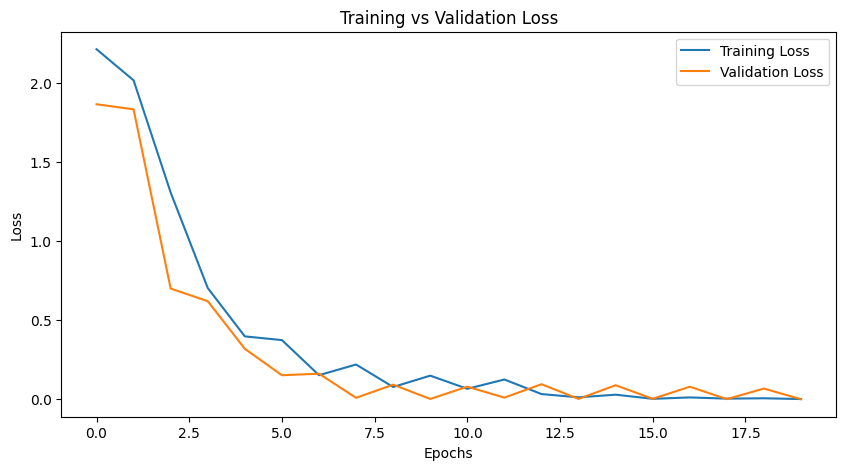

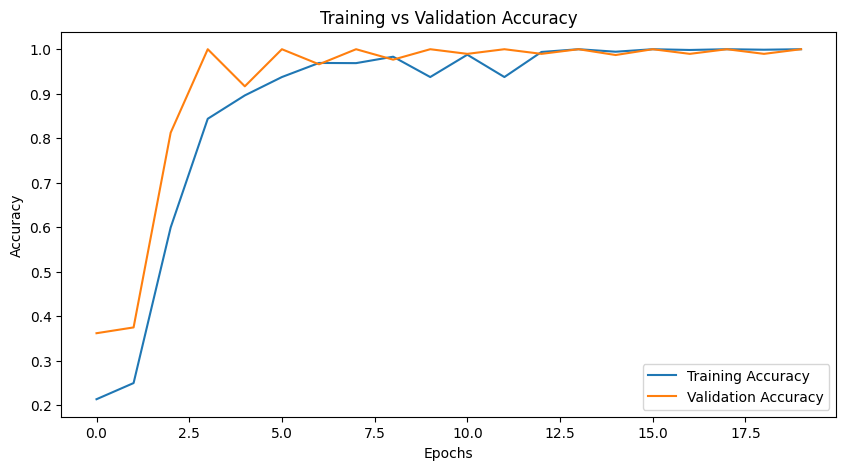

In [ ]:
import matplotlib.pyplot as plt

# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Plot Confusion Matrix

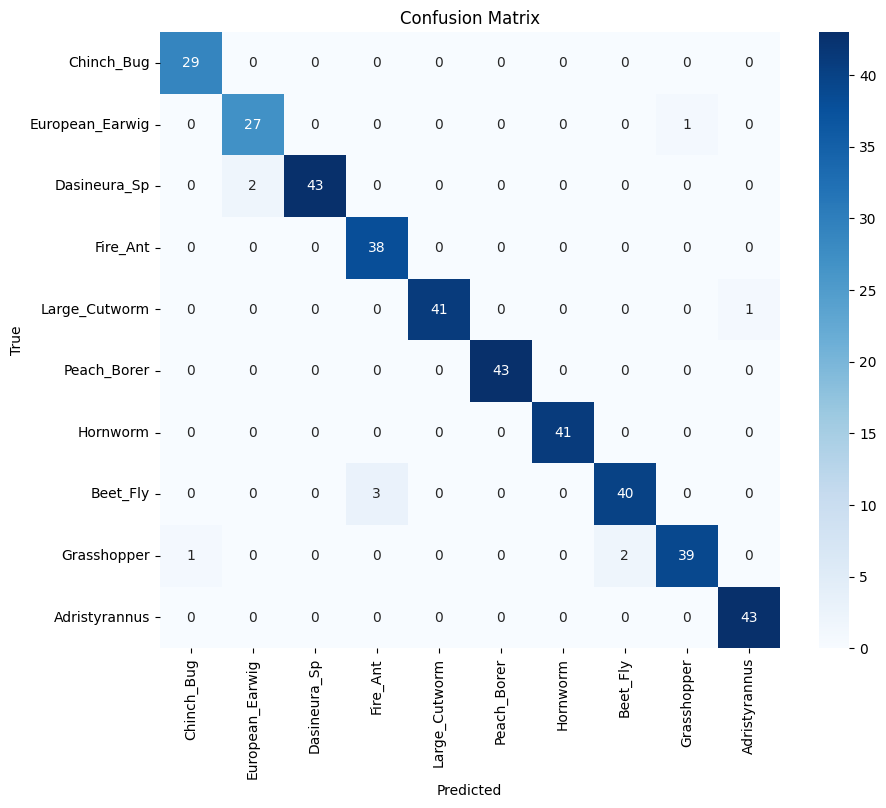

In [ ]:
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Plot AUC-ROC Curve

 1/13 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 571ms/step


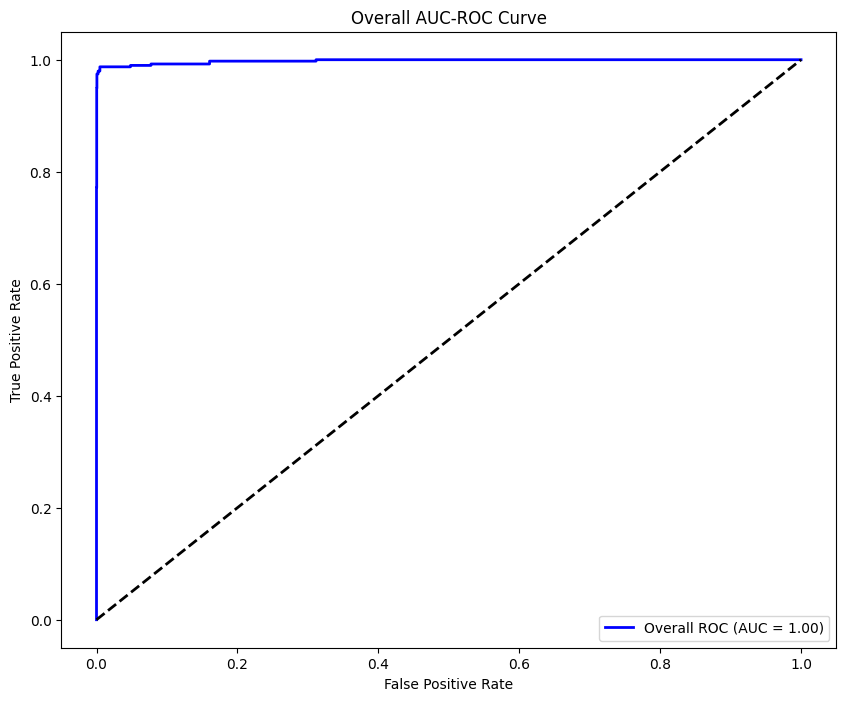

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Extract true labels and binarize them
y_true = test_generator.classes  # True class indices from the test dataset
class_names = list(test_generator.class_indices.keys())  # Retrieve class names dynamically
y_true_bin = label_binarize(y_true, classes=range(len(class_names)))

# Predict probabilities using the trained model
y_pred_prob = final_model.predict(test_generator)

# Compute micro-average ROC curve and AUC
fpr, tpr, _ = roc_curve(y_true_bin.ravel(), y_pred_prob.ravel())
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Overall ROC (AUC = {roc_auc:.2f})')

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=2)

# Add labels, title, and legend
plt.title('Overall AUC-ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


## Save the Model

In [ ]:
final_model.save('/content/drive/MyDrive/CNN/cnn_final_model.h5')
print("Model saved successfully!")


Model saved successfully!


## Pest Detection and Pesticide Recommendation

Please upload an image of the pest:


Saving Fire Ant_5.jpeg to Fire Ant_5.jpeg
Processing file: Fire Ant_5.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
Detected Pest: Fire_Ant
Confidence: 99.81%
Recommended Pesticide: Hydramethylnon Bait


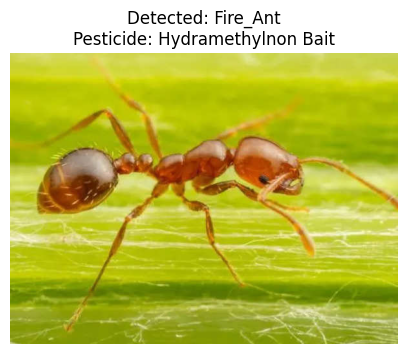

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt

# Load the Pretrained Model
model_path = "/content/drive/MyDrive/CNN/cnn_final_model.h5"  # Update path if needed
model = tf.keras.models.load_model(model_path)

# Define Pest-to-Pesticide Mapping
pest_to_pesticide = {
    "Adristryannus": "Neem Oil",
    "Beet_Fly": "Pyrethrin Spray",
    "Chinch_Bug": "Bifenthrin Insecticide",
    "Dasineura_Sp": "Spinosad Soil Drench",
    "European_Earwig": "Diatomaceous Earth",
    "Fire_Ant": "Hydramethylnon Bait",
    "Grasshopper": "Nosema Locustae",
    "Hornworm": "Bacillus Thuringiensis (Bt)",
    "Large_Cutworm": "Carbaryl Dust",
    "Peach_Borer": "Permethrin Spray"
}


# Class Names (Ensure these are in the same order as your dataset's directory structure)
class_names = list(pest_to_pesticide.keys())

def preprocess_image(image_path, img_size=(128, 128)):
    """
    Preprocesses the input image to be compatible with the model.
    """
    image = load_img(image_path, target_size=img_size)
    image = img_to_array(image) / 255.0  # Normalize pixel values
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

def detect_pest_and_recommend_pesticide(image_path):
    """
    Detects the pest in the given image and recommends a pesticide.
    """
    # Preprocess Image
    image = preprocess_image(image_path)

    # Predict Pest Class
    predictions = model.predict(image)
    predicted_class = np.argmax(predictions, axis=-1)[0]
    pest_name = class_names[predicted_class]
    confidence = predictions[0][predicted_class]

    # Recommend Pesticide
    recommended_pesticide = pest_to_pesticide[pest_name]

    # Output Results
    print(f"Detected Pest: {pest_name}")
    print(f"Confidence: {confidence * 100:.2f}%")
    print(f"Recommended Pesticide: {recommended_pesticide}")

    # Display the Image
    plt.figure(figsize=(5, 5))
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Detected: {pest_name}\nPesticide: {recommended_pesticide}")
    plt.show()

# User Uploads Image
print("Please upload an image of the pest:")
uploaded = files.upload()

# Process Uploaded Image
for filename in uploaded.keys():
    print(f"Processing file: {filename}")
    detect_pest_and_recommend_pesticide(filename)


In [ ]:
from sklearn.metrics import accuracy_score

# Get true labels and predictions from the test set
y_true = test_generator.classes  # True labels
y_pred_prob = final_model.predict(test_generator)  # Predicted probabilities
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to predicted labels

# Calculate overall accuracy
overall_accuracy = accuracy_score(y_true, y_pred)

# Print the accuracy
print(f"Overall Model Accuracy: {overall_accuracy * 100:.2f}%")


 1/13 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 863ms/step
Overall Model Accuracy: 97.46%
